In [1]:
import keras
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report
import matplotlib.pyplot as plt

In [2]:
IMG_SIZE = 224

In [3]:
model = keras.models.load_model("FER_Model.h5")

In [4]:
test_data_generator = ImageDataGenerator(preprocessing_function=keras.applications.resnet_v2.preprocess_input)

test_path = "FER-2013/test/"
test_batches = test_data_generator.flow_from_directory(directory=test_path,
                                                       target_size=(IMG_SIZE, IMG_SIZE),
                                                       batch_size=32,
                                                       color_mode="rgb",
                                                       class_mode="categorical",
                                                       shuffle=False,
                                                       interpolation="bicubic")

Found 6043 images belonging to 5 classes.


In [5]:
predictions = model.predict(test_batches)

189/189 [==============================] - 349s 2s/step


-----------------------------------------------------------------
Confusion Matrix
[[ 674   33   81  131   39]
 [  48 1531   92   60   43]
 [ 109   62  827  199   36]
 [ 181   33  215  791   27]
 [  34   44   21   23  709]]


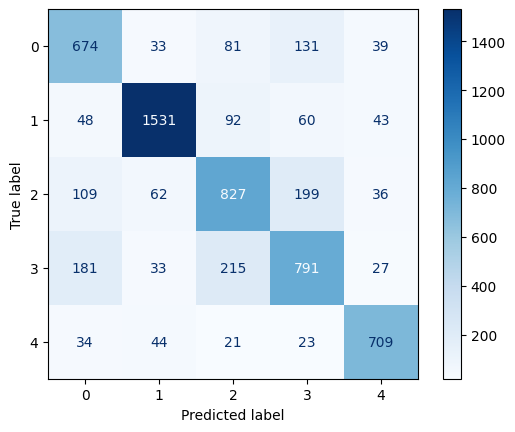

In [6]:
print("-----------------------------------------------------------------")
print("Confusion Matrix")
c_matrix = confusion_matrix(test_batches.classes, predictions.argmax(axis=1))
print(c_matrix)
cm_display = ConfusionMatrixDisplay(confusion_matrix=c_matrix)
cm_display.plot(cmap=plt.cm.Blues)
plt.show()

In [7]:
print("-----------------------------------------------------------------")
print("Classification Report")
print(classification_report(test_batches.classes, predictions.argmax(axis=1)))

-----------------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.64      0.70      0.67       958
           1       0.90      0.86      0.88      1774
           2       0.67      0.67      0.67      1233
           3       0.66      0.63      0.65      1247
           4       0.83      0.85      0.84       831

    accuracy                           0.75      6043
   macro avg       0.74      0.74      0.74      6043
weighted avg       0.75      0.75      0.75      6043

